<font size="6" color="#3AC1EF">▍Итоговое задание</font>


## Описание датасета

1. `school` — аббревиатура школы, в которой учится ученик
2. `sex` — пол ученика ('`F`' - женский, '`M`' - мужской)
3. `age` — возраст ученика (от `15` до `22`)
4. `address` — тип адреса ученика ('`U`' - городской, '`R`' - за городом)
5. `famsize` — размер семьи('`LE3`' <= 3, '`GT3`' >3)
6. `Pstatus` — статус совместного жилья родителей ('`T`' - живут вместе '`A`' - раздельно)
7. `Medu` — образование матери (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)
8. `Fedu` — образование отца (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)
9. `Mjob` — работа матери ('`teacher`' - учитель, '`health`' - сфера здравоохранения, '`services`' - гос служба, '`at_home`' - не работает, '`other`' - другое)
10. `Fjob` — работа отца ('`teacher`' - учитель, '`health`' - сфера здравоохранения, '`services`' - гос служба, '`at_home`' - не работает, '`other`' - другое)
11. `reason` — причина выбора школы ('`home`' - близость к дому, '`reputation`' - репутация школы, '`course`' - образовательная программа, '`other`' - другое)
12. `guardian` — опекун ('`mother`' - мать, '`father`' - отец, '`other`' - другое)
13. `traveltime` — время в пути до школы (`1` - <15 мин., `2` - 15-30 мин., `3` - 30-60 мин., `4` - >60 мин.)
14. `studytime` — время на учёбу помимо школы в неделю (`1` - <2 часов, `2` - 2-5 часов, `3` - 5-10 часов, `4` - >10 часов)
15. `failures` — количество внеучебных неудач (`n`, если `1 <= n <=3` , иначе `0`)
16. `schoolsup` — дополнительная образовательная поддержка (`yes` или `no`)
17. `famsup` — семейная образовательная поддержка (`yes` или `no`)
18. `paid` — дополнительные платные занятия по математике (`yes` или `no`)
19. `activities` — дополнительные внеучебные занятия (`yes` или `no`)
20. `nursery` — посещал детский сад (`yes` или `no`)
21. `higher` — хочет получить высшее образование (`yes` или `no`)
22. `studytime, granular` - 
23. `internet` — наличие интернета дома (`yes` или `no`)
24. `romantic` — в романтических отношениях (`yes` или `no`)
25. `famrel` — семейные отношения (от `1` - очень плохо до `5` - очень хорошо)
26. `freetime` — свободное время после школы (от `1` - очень мало до `5` - очень мого)
27. `goout` — проведение времени с друзьями (от `1` - очень мало до `5` - очень много)
28. `health` — текущее состояние здоровья (от `1` - очень плохо до `5` - очень хорошо)
29. `absences` — количество пропущенных занятий
30. `score` — баллы по госэкзамену по математике

# <font color=DodgerBlue>Общий анализ датасета</font>

|Характеристика |Значение |
|:--------------|:-----------|
|Количество наблюдений|395 |
|Количество параметров |30 |
|    - числовых|13|
|    - категориальных|9|
|    - логических ( yes / no )|8|
|Количество дубликатов |0 |
|Количество дубликатов (%) |0.0% |
|Всего пропущенных значений |565 |
|Всего пропущенных значений (%) |4.77% |
|Количество параметров без пропусков |3 |
|Количество параметров с пропусками |27 |

|ТОП-5 по кол-ву пропусков |Значение |Значение, % |
|:------------------|:-----------------|:-----------|
|<font color=red>1. Pstatus |45 |11.4%|
|<font color=red>2. paid |40 |10.1% |
|<font color=red>3. famsup|39 |9.9% |
|<font color=red>4. Fjob |36 |9.1%% |
|<font color=red>5. internet |34 |8.6% |
|Всего пустых ячеек у Топ-5 (от пропусков):|194|34.34 %|
|Всего пустых ячеек у Топ-5 (от всех ячеек):|194|1.64 %|




<font size=4 color=red>**Warning!**</font> Ключевой параметр **score** имеет **6 пропусков**.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.xls') # рабочий датафрейм
final_df = pd.DataFrame() # датафрейм для финальных данных

In [12]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [13]:
# смотрим на описательные статистики числовых параметров:
#     - кол-во не пустых значений
#     - среднее значение
#     - стандартное отклонение
#     - минимальное значение
#     - Q_1
#     - Q_2
#     - Q_3
#     - максимальное значение

df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [14]:
# смотрим на статистики не числовых параметров:
#     - кол-во не пустых значений
#     - кол-во уникальных значений
#     - наиболее часто встречающееся значение
#     - сколько раз оно встречается

df.describe(include=['object', 'bool'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [15]:
# смотрим на все параметры, в которых есть пропуски - выведим кол-во пустых ячеек по каждому:

df.isnull().sum().sort_values(ascending=False)

Pstatus                45
paid                   40
famsup                 39
Fjob                   36
internet               34
romantic               31
guardian               31
traveltime             28
famrel                 27
famsize                27
Fedu                   24
failures               22
higher                 20
Mjob                   19
reason                 17
address                17
nursery                16
health                 15
activities             14
absences               12
freetime               11
schoolsup               9
goout                   8
studytime               7
studytime, granular     7
score                   6
Medu                    3
sex                     0
age                     0
school                  0
dtype: int64

In [16]:
# то же, что и выше, только в %:

columns_with_nulls = []

for col in df.columns:
    pct_missing = df[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')
    if pct_missing > 0:
        columns_with_nulls.append(pct_missing)
        
print('\nКол-во параметров с пропусками:', len(columns_with_nulls))


school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime, granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%

Кол-во параметров с пропусками: 27


<AxesSubplot:>

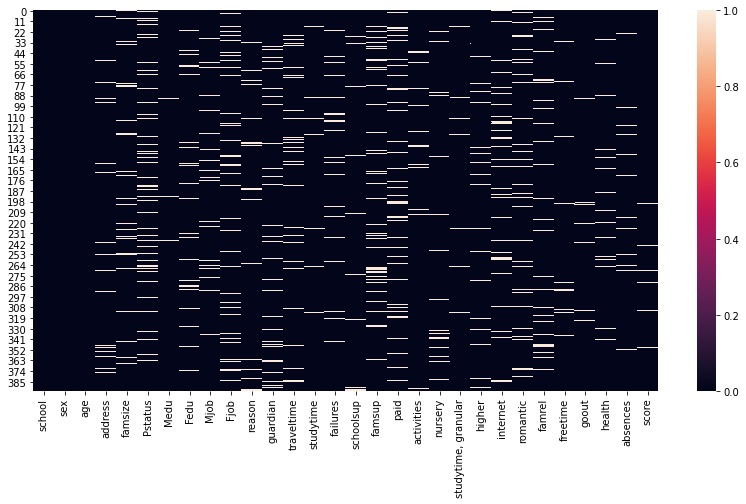

In [17]:
# то же, что и выше, только в графике:

plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull())

In [18]:
# всего пустых ячеек:

print('Всего пустых ячеек:',df.isnull().sum().sum())
print('Всего пустых ячеек:',round((df.isnull().sum().sum()) / (len(df.columns) * len(df))*100,2),'%')

Всего пустых ячеек: 565
Всего пустых ячеек: 4.77 %


In [19]:
# пустых ячеек в ТОП-5 по пропускам:

top5 = df.isnull().sum().sort_values(ascending=False).head()

print('Топ-5 параметров по пропускам:',top5.index)

print('Всего пустых ячеек у Топ-5:',top5.sum())
print('Всего пустых ячеек у Топ-5:',round(df[['Pstatus','paid','famsup','Fjob','internet']].isnull().sum().sum() / (df.isnull().sum().sum())*100,2),'% от всех пропусков')
print('Всего пустых ячеек у Топ-5:',round(df[['Pstatus','paid','famsup','Fjob','internet']].isnull().sum().sum() / (len(df.columns) * len(df))*100,2),'% от всех ячеек')

Топ-5 параметров по пропускам: Index(['Pstatus', 'paid', 'famsup', 'Fjob', 'internet'], dtype='object')
Всего пустых ячеек у Топ-5: 194
Всего пустых ячеек у Топ-5: 34.34 % от всех пропусков
Всего пустых ячеек у Топ-5: 1.64 % от всех ячеек


## <font color=DodgerBlue>Функции для предобработки</font>

In [20]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.boxplot(x=column, y='score', data=df, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

    
# функции для создания новых колонок с числовым аналогом для исследования корреляции с другими числовыми значениями 
# и-или для формирования доп. признаков

def binar_code(s):
    if s == 'yes':
        return 1
    elif s == 'no':
        return 2
    else:
        return 0
    
def school_code(s):
    if 'GP' in s:
        return 1
    elif 'MS' in s:
        return 2
    else:
        return 0

def sex_code(s):
    if 'F' in s:
        return 1
    elif 'M' in s:
        return 2
    else:
        return 0
    
def address_code(s):
    if s == 'U':
        return 1
    elif s == 'R':
        return 2
    else:
        return 0
    
def job_code(s):
    if s == 'other':
        return 1
    elif s == 'services':
        return 2
    elif s == 'teacher':
        return 3
    elif s == 'at_home':
        return 4
    elif s == 'health':
        return 5
    else:
        return 0
    

# <font color=DodgerBlue>Рассмотрим все столбцы по отдельности</font>


Для начала посмотрю, какая наблюдается зависимость ключевого параметра *score* от каждой из этих переменных в "неочищенном состоянии". Возможно этот шаг лишний, но так как я делаю подобный анализ впервые, мне интересно сравнить результаты До и После.

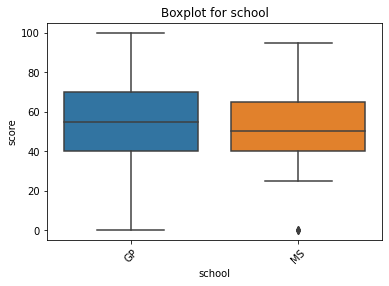

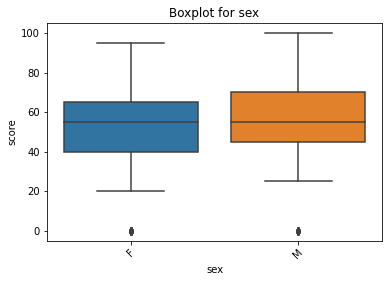

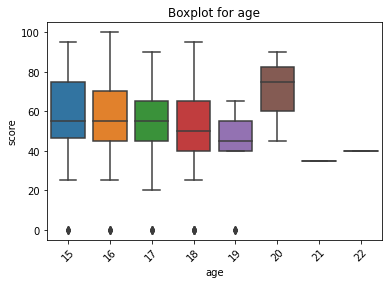

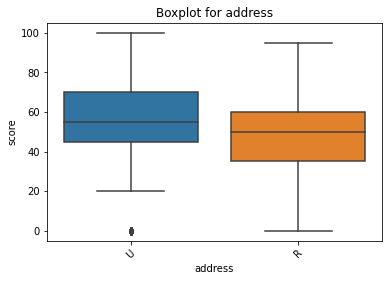

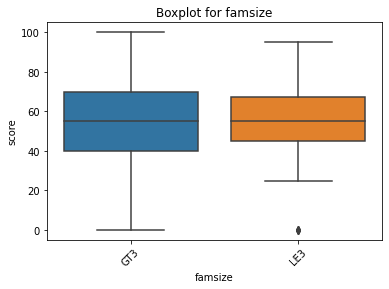

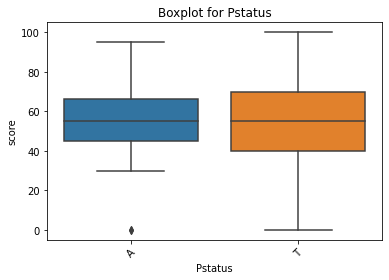

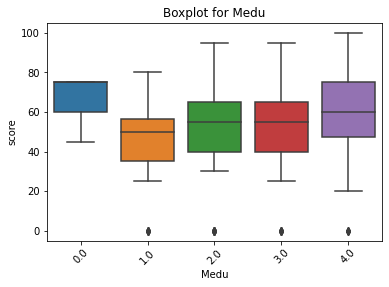

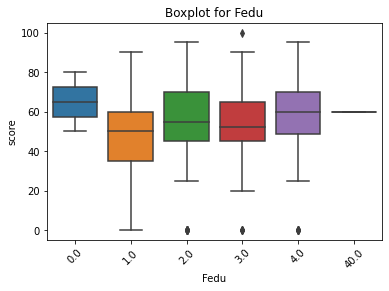

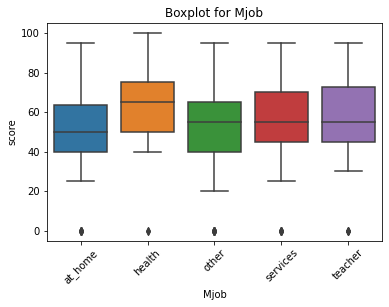

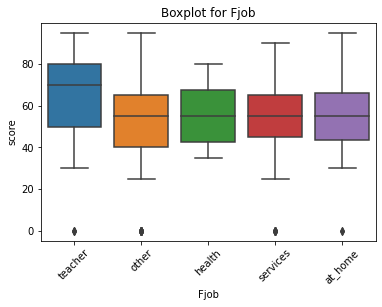

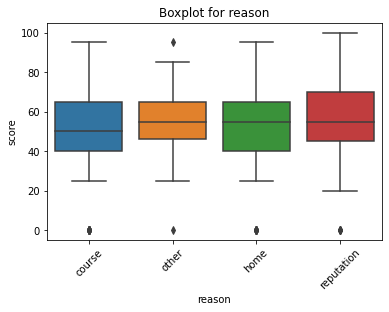

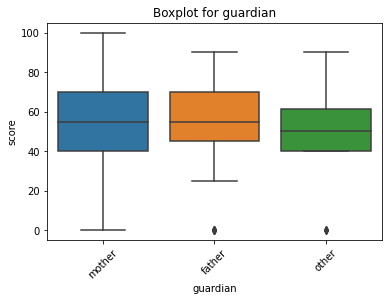

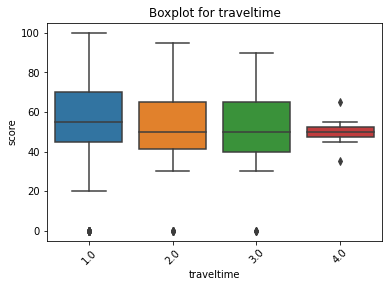

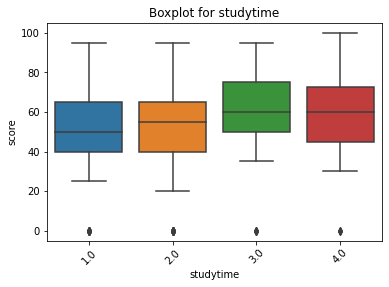

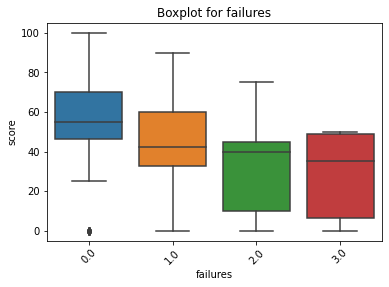

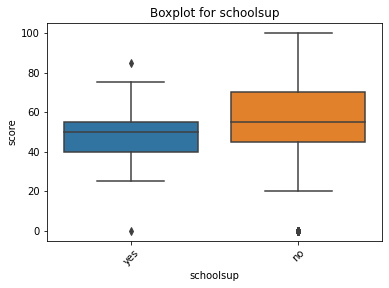

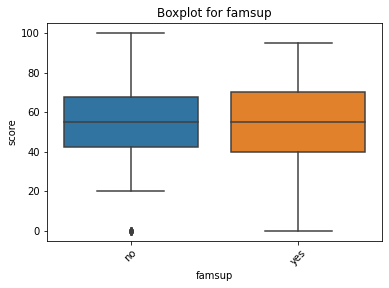

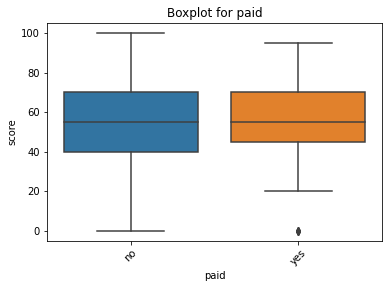

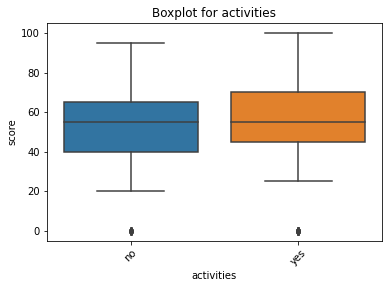

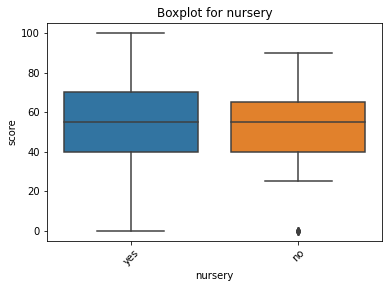

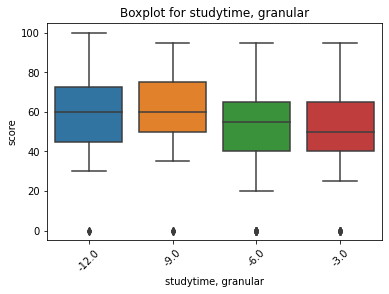

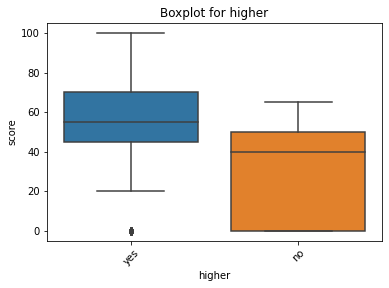

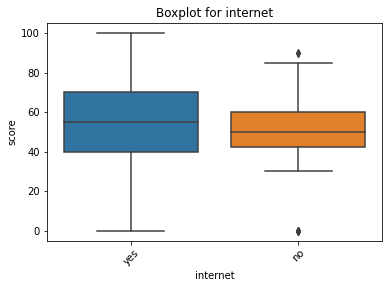

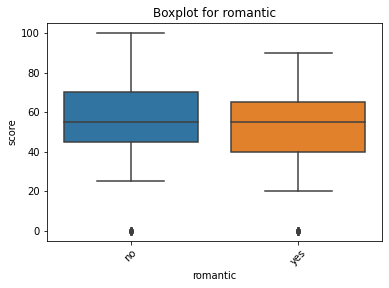

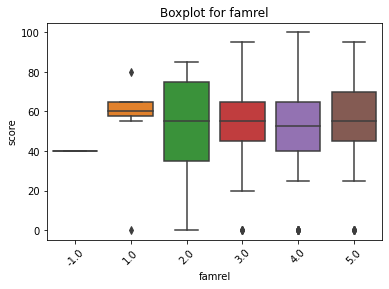

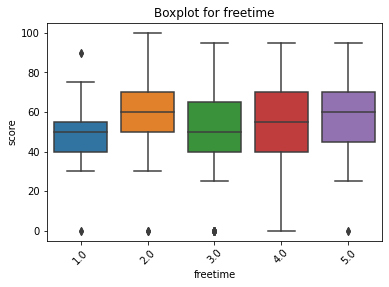

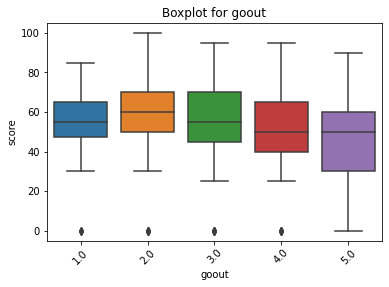

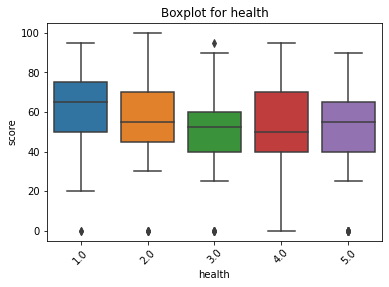

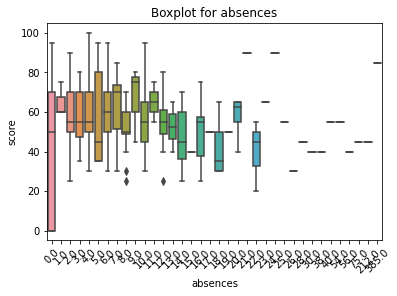

In [22]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
            'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

## <font color=DodgerBlue>school</font>

`school` — аббревиатура школы, в которой учится ученик

- пустых значений - **нет**
- уникальных значений: `2`
- можно добавить новую колонку с числовым аналогом (`1,2`) для исследования корреляции с числовыми значениями или возможности добавления производных признаков


In [23]:
# смотрим на уникальные и пустые значения

print(pd.DataFrame(df.school.value_counts(dropna=False)))
print(round(pd.DataFrame(df.school.value_counts(normalize=True, dropna=False)),2))

    school
GP     349
MS      46
    school
GP    0.88
MS    0.12


In [24]:
df.school.describe() # смотрим на статистики

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

<AxesSubplot:xlabel='school', ylabel='score'>

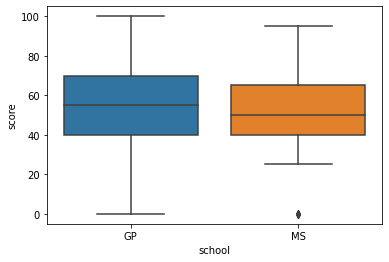

In [25]:
sns.boxplot(x = 'school', y = 'score', data = df) # смотрим на распределение на примере графика boxplot

#### Выводы:
- 88% наблюдений относятся к ученикам школы GP
- разброс оценок этой школы больше, но медиана оценок выше и также ученики этой школы получали максимально возможные экзаменационные балы по математике, в отличии от второй школы

Из последнего вывода следует, что параметр следует оставить для построения модели.

In [214]:
final_df['school_code'] = df.school.apply(school_code)

## <font color=DodgerBlue>sex</font>

`sex` — пол ученика ('`F`' - женский, '`M`' - мужской)

- пустых значений - **нет**
- уникальных значений: `2`
- можно добавить новую колонку с числовым аналогом (`1,2`) для исследования корреляции с числовыми значениями или возможности добавления производных признаков

In [27]:
pd.DataFrame(df.sex.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,sex
F,208
M,187


In [28]:
df.sex.describe() # смотрим на статистики

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

<AxesSubplot:xlabel='sex', ylabel='score'>

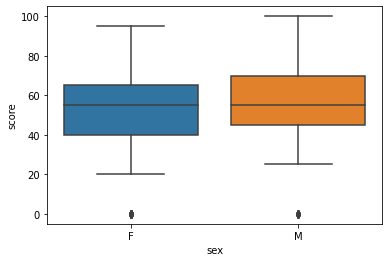

In [29]:
sns.boxplot(x = 'sex', y = 'score', data = df) # смотрим на распределение на примере графика boxplot

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


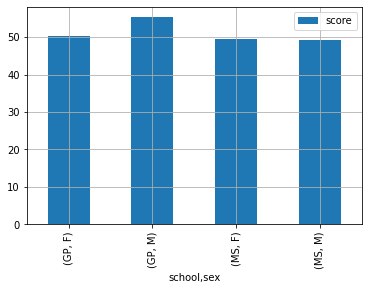

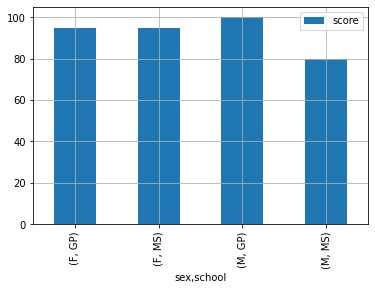

In [30]:
# поскольку мы рассмотрели уже две переменные, посмотрим также их вместе - как "пол" и "школа" в паре связаны с оценками:
# - смотрим на средние значения оценок
# - смотрим на максимальные оценки

print(df.pivot_table(values = 'score', index = ['school', 'sex'], aggfunc = 'mean').plot(kind = 'bar', grid = True))
print(df.pivot_table(values = 'score', index = ['sex', 'school'], aggfunc = 'max').plot(kind = 'bar', grid = True))

Из графиков выше можно сказать следующее:
- успеваемость девочек по математике в обоих школах одинакова
- успеваемость мальчиков по математике различается
    - в школе **MS** успеваемость мальчиков хуже девочек из обеих школ и их оценки **не превышают 80 баллов**
    - из всех учеников обеих школ, **максимально** возможные балы по математике есть **только** у мальчиков школы **GP**
    
Если переложить последнее в цифры, то если в школе GP примерно 350 учеников и примерно половина из них девочки, то из 175 девочек этой школы и из 208 девочек из обеих школ никто не смог получить максимальный экзаменационный балл по математике :((


#### Выводы:
- количество наблюдений по полу примерно одинаковое
- разброс значений оценок и их распределение также сравнимо, но максимально возможные экзаменационные балы по математике есть у мальчиков и отсутствуют у девочек

Из последнего вывода следует, что параметр следует оставить для построения модели.

In [201]:
final_df['sex_code'] = df.sex.apply(sex_code)

## <font color=DodgerBlue>age</font>

`age` — возраст ученика (от `15` до `22`)

- пустых значений - **нет**
- уникальных значений: **8**
- параметр содержит выбросы

In [32]:
# смотрим на уникальные и пустые значения

print(pd.DataFrame(df.age.value_counts(dropna=False)))
print("Уникальных значений:", df.age.nunique())

    age
16  104
17   98
15   82
18   82
19   24
20    3
21    1
22    1
Уникальных значений: 8


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

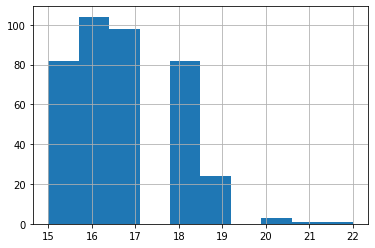

In [33]:
df.age.hist() # смотрим на распределение
df.age.describe()

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


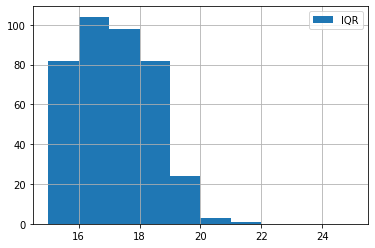

In [35]:
# посмотрим на выбросы и отфильтруем их, воспользовавшись формулой интерквартильного расстояния (межквартильного размаха)
# выбросами будем считать все значение, которые лежат вне IQR 

IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)

print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.age.loc[df.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (15, 25), label = 'IQR')
 
plt.legend();

In [36]:
# удаляем выбросы

df = df.loc[(df.age >= (perc25 - 1.5*IQR)) & (df.age <= (perc75 + 1.5*IQR))]

In [37]:
# смотрим, что получилось: уникальных значений стало на 1 меньше 

print(pd.DataFrame(df.age.value_counts(dropna=False)))
print("Уникальных значений:", df.age.nunique())

    age
16  104
17   98
15   82
18   82
19   24
20    3
21    1
Уникальных значений: 7


<AxesSubplot:xlabel='age', ylabel='score'>

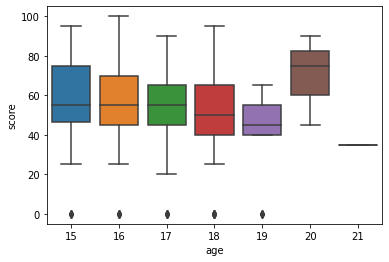

In [38]:
sns.boxplot(x = 'age', y = 'score', data = df) # смотрим на зависимость с переменной score

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


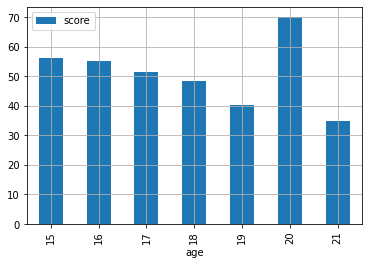

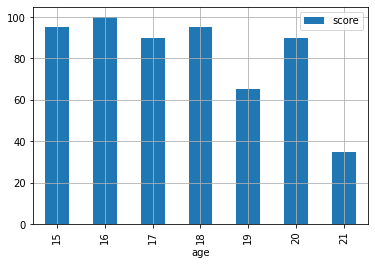

In [39]:
# смотрим на влияние среднего и максимума возраста на экзаменационную оценку
    
print(df.pivot_table(values = 'score', index = 'age', aggfunc = 'mean').plot(kind = 'bar', grid = True))
print(df.pivot_table(values = 'score', index = 'age', aggfunc = 'max').plot(kind = 'bar', grid = True))

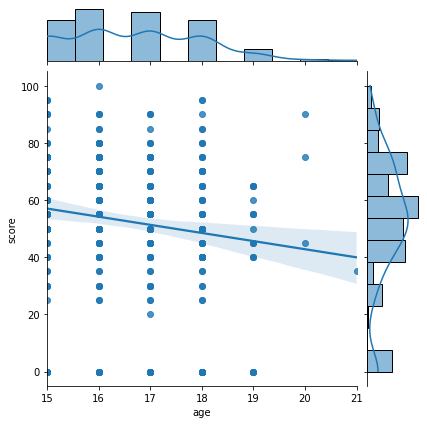

In [40]:
# смотрим на зависимость возраста и экзаменационной оценки

sns.jointplot(x = 'age', y = 'score', data = df, kind = 'reg')

#### Выводы:
- распределение данных говорит о том, что **50%** учеников в возрасте **от 16 до 18 лет**
- межвартильное расстояние от **13 до 21 года**
- c увеличением возраста средний балл снижается

Из последнего вывода следует, что параметр следует оставить для построения модели.

In [203]:
final_df['age'] = df.age

## <font color=DodgerBlue>address</font>

`address` — тип адреса ученика ('`U`' - городской, '`R`' - за городом)

- уникальных значений: **2**
- кол-во записей без информации об адресе: **17**
- пустые значения можно заменить на **моду** или другое значение по результату анализа
- можно заменить на числовые значения для исследования корреляции с другими числовыми значениями

In [41]:
pd.DataFrame(df.address.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,address
U,294
R,83
NaN,17


In [42]:
pd.DataFrame(df.address.describe())  # смотрим на статистики

,address
count,377
unique,2
top,U
freq,294


In [43]:
print(round(pd.DataFrame(df.address.value_counts(normalize=True, dropna=False)),2))

     address
U       0.75
R       0.21
NaN     0.04


In [44]:
df[df.address.isnull() == True] # cмотрим на заполненность других колонок в записях с пустым адресом

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,school_code,sex_code
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0,1,2
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0,1,2
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0,1,2
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0,1,1
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0,1,2
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0,1,2
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0,1,1
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0,1,2
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0,1,2
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN,1,1


In [45]:
# чтобы понять, на какое значение заменить пустой адрес, исследуем эту переменную с другими значениями, 
# имеющими косвенное отношение к месту жительства :

df.groupby(['traveltime','school','address']).traveltime.count() # кол-во учеников в разрезе 3-х полей

traveltime  school  address
1.0         GP      R           29
                    U          191
            MS      R            5
                    U            8
2.0         GP      R           18
                    U           56
            MS      R            8
                    U            9
3.0         GP      R            5
                    U            9
            MS      R            7
4.0         GP      R            3
                    U            3
            MS      R            1
Name: traveltime, dtype: int64

In [46]:
# кол-во учеников с пустым адресом в разрезе школы и времени до школы :

df[df.address.isnull() == True].groupby(['traveltime','school']).traveltime.count()

traveltime  school
1.0         GP        8
2.0         GP        2
            MS        3
3.0         MS        1
Name: traveltime, dtype: int64

In [47]:
# смотрим на моды 4-х пар значений, которые встречаются в строках с пустым адресом :

print(df[(df.traveltime == 1.0) & (df.school == 'GP')].address.mode())
print(df[(df.traveltime == 2.0) & (df.school == 'GP')].address.mode())
print(df[(df.traveltime == 2.0) & (df.school == 'MS')].address.mode())
print(df[(df.traveltime == 3.0) & (df.school == 'MS')].address.mode())

0    U
dtype: object
0    U
dtype: object
0    U
dtype: object
0    R
dtype: object


In [48]:
# по идее, можно было бы заменить не на моду значения в целом, а на моду в подвыборке по школе и времени до школы,
# но так как это на 99% совпадает с модой по значению в целом, но меняем на него :

df.address.fillna(df.address.mode()[0], inplace=True) # заменяем пустые значения на наиболее часто встречающееся
pd.DataFrame(df.address.value_counts(dropna=False)) # проверяем результат замены

,address
U,311
R,83


<AxesSubplot:xlabel='address', ylabel='score'>

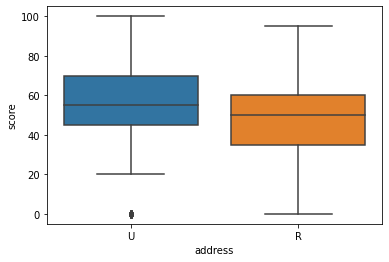

In [49]:
sns.boxplot(x = 'address', y = 'score', data = df) # смотрим на связь с переменной score

#### Выводы:
- распределение данных говорит о том, что **75%** учеников проживает в **городе**
- строки с пустым адресом достаточно заполнены другими значениями, поэтому их не удаляем, а пустые значения заменим на подходящее (подходящим выбрана мода)

Зависимость `address` с параметром `score` слабая, но оставим пока для дальнейшего анализа.

In [205]:
final_df['address_code'] = df.address.apply(address_code)

## <font color=DodgerBlue>famsize</font>

`famsize` — размер семьи('`LE3`' <= 3, '`GT3`' >3)

- уникальных значений: **2**
- кол-во записей без информации о размере семъи: **27**
- можно добавить новую колонку с числовым аналогом (1,2) для исследования корреляции с числовыми значениями или возможности добавления производных признаков

**Выводы:**
- 88% наблюдений относятся к ученикам школы GP
- разброс оценок этой школы больше, но медиана оценок выше и также ученики этой школы получали максимально возможные - экзаменационные балы по математике, в отличии от второй школы

Из последнего вывода следует, что параметр следует оставить для построения модели.


In [54]:
pd.DataFrame(df.famsize.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,famsize
GT3,260
LE3,107
NaN,27


In [55]:
pd.DataFrame(df.famsize.describe()) # смотрим на статистики

,famsize
count,367
unique,2
top,GT3
freq,260


In [56]:
# df.famsize = df.famsize.apply(lambda x: x.replace('None', 'NaN'))

In [57]:
df.famsize.fillna(df.famsize.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.famsize.value_counts(dropna=False)) # проверяем результат замены

,famsize
GT3,287
LE3,107


<AxesSubplot:xlabel='famsize', ylabel='score'>

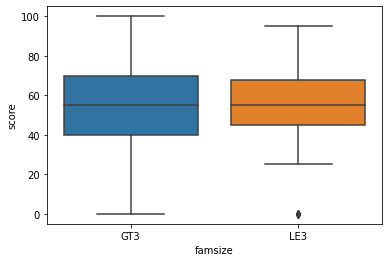

In [58]:
sns.boxplot(x = 'famsize', y = 'score', data = df) # смотрим на распределение на примере графика boxplot

**Вывод:** 
 - влияние `famsize` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>Pstatus</font>

`Pstatus` — статус совместного жилья родителей ('`T`' - живут вместе '`A`' - раздельно)

- уникальных значений: **2**
- кол-во записей без информации о статусе совместного жилья родителей: **45**
- можно заменить на числовые значения для исследования корреляции с другими числовыми значениями
- есть пустые значения в виде `nan`- заменим их на `None`


In [60]:
pd.DataFrame(df.Pstatus.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,Pstatus
T,313
NaN,45
A,36


In [61]:
df.Pstatus.fillna(df.Pstatus.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.Pstatus.value_counts(dropna=False)) # проверяем результат замены

,Pstatus
T,358
A,36


<AxesSubplot:xlabel='Pstatus', ylabel='score'>

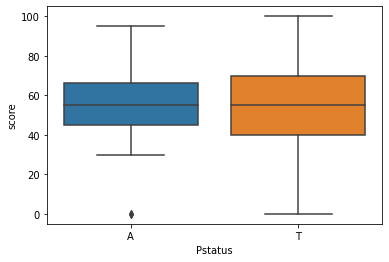

In [62]:
# смотрим на распределение параметра на примере графика boxplot и связь с ключевой переменной score

sns.boxplot(x = 'Pstatus', y = 'score', data = df)

**Вывод:** 
 - влияние `Pstatus` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>Medu & Fedu</font>

`Medu` — образование матери (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)

`Fedu` — образование отца (`0` - нет, `1` - 4 класса, `2` - 5-9 классы, `3` - среднее специальное или 11 классов, `4` - высшее)

- уникальных значений: **5**
- кол-во записей без информации об образовании отца и-или матери: **24** и **3** соответственно
- в **Fedu** есть ошибка в значении, которую нужно исправить

In [64]:
pd.DataFrame(df.Medu.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
NaN,3
0.0,3


In [74]:
df.Medu.fillna(df.Medu.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.Medu.value_counts(dropna=False)) # проверяем результат замены

,Medu
4.0,134
2.0,102
3.0,96
1.0,59
0.0,3


In [65]:
pd.DataFrame(df.Fedu.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
NaN,24
0.0,2
40.0,1


In [75]:
df.Fedu.replace(40.0, 4.0, inplace=True) # исправляем ошибку в данных

df.Fedu.fillna(df.Fedu.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.Fedu.value_counts(dropna=False)) # проверяем результат замены

,Fedu
2.0,130
3.0,96
4.0,89
1.0,77
0.0,2


<AxesSubplot:xlabel='Medu', ylabel='score'>

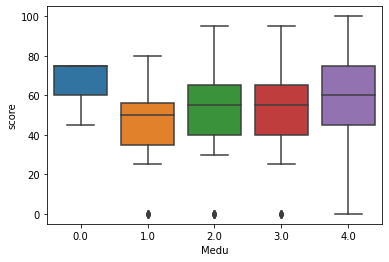

In [76]:
sns.boxplot(x = 'Medu', y = 'score', data = df) # смотрим на распределение и связь с ключевой переменной score

<AxesSubplot:xlabel='Fedu', ylabel='score'>

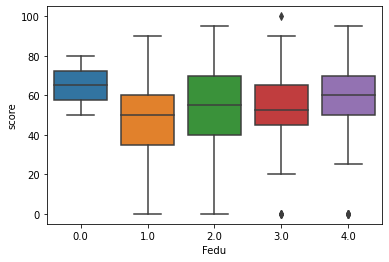

In [77]:
sns.boxplot(x = 'Fedu', y = 'score', data = df) # смотрим на распределение и связь с ключевой переменной score

**Вывод:** 
 - влияние `Medu` и `Fedu` на переменную `score` видна, параметры необходимо взять в финальную выборку.

In [206]:
final_df['Medu'] = df.Medu
final_df['Fedu'] = df.Fedu

## <font color=DodgerBlue>Mjob & Fjob</font>

`Mjob` — работа матери ('`teacher`' - учитель, '`health`' - сфера здравоохранения, '`services`' - гос служба, '`at_home`' - не работает, '`other`' - другое)

`Fjob` — работа отца ('`teacher`' - учитель, '`health`' - сфера здравоохранения, '`services`' - гос служба, '`at_home`' - не работает, '`other`' - другое)

- уникальных значений: **5**
- кол-во записей без информации об образовании отца и-или матери: **19** и **36** соответственно

In [78]:
pd.DataFrame(df.Mjob.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32
NaN,19


In [79]:
pd.DataFrame(df.Fjob.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,Fjob
other,197
services,101
NaN,36
teacher,29
at_home,16
health,15


In [80]:
df.Mjob.fillna(df.Mjob.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.Mjob.value_counts(dropna=False)) # проверяем результат замены

,Mjob
other,152
services,97
at_home,58
teacher,55
health,32


In [81]:
df.Fjob.fillna(df.Fjob.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.Fjob.value_counts(dropna=False)) # проверяем результат замены

,Fjob
other,233
services,101
teacher,29
at_home,16
health,15


count       394
unique        5
top       other
freq        152
Name: Mjob, dtype: object

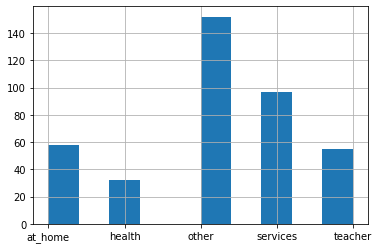

In [82]:
df.Mjob.hist() # смотрим на распределение
df.Mjob.describe()

count       394
unique        5
top       other
freq        233
Name: Fjob, dtype: object

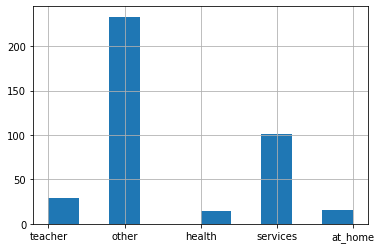

In [83]:
df.Fjob.hist() # смотрим на распределение
df.Fjob.describe()

<AxesSubplot:xlabel='Mjob', ylabel='score'>

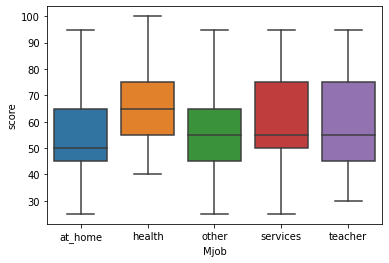

In [84]:
# sns.boxplot(x = 'Mjob', y = 'score', data = df)
sns.boxplot(x = 'Mjob', y = 'score', data = df[df['score'] > 20])

<AxesSubplot:xlabel='Fjob', ylabel='score'>

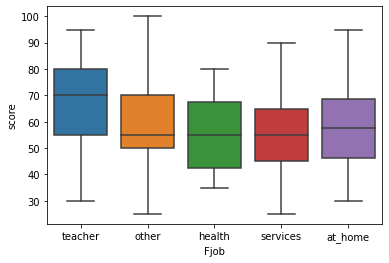

In [85]:
# sns.boxplot(x = 'Fjob', y = 'score', data = df)
sns.boxplot(x = 'Fjob', y = 'score', data = df[df['score'] > 20])

**Вывод:** 
 - влияние `Mjob` и `Fjob` на переменную `score` видна, параметры необходимо взять в финальную выборку.

In [211]:
final_df['Mjob_code'] = df.Mjob.apply(job_code)
final_df['Fjob_code'] = df.Fjob.apply(job_code)

array([<AxesSubplot:title={'center':'Профессия матери'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Профессия отца'}, ylabel='Frequency'>],
      dtype=object)

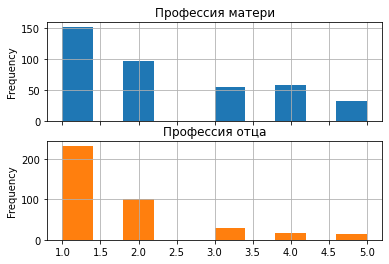

In [87]:
df[['Mjob_code', 'Fjob_code']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Профессия матери', 'Профессия отца'], 
                               legend = False)

## <font color=DodgerBlue>reason</font>

`reason` — причина выбора школы ('`home`' - близость к дому, '`reputation`' - репутация школы, '`course`' - образовательная программа, '`other`' - другое)

In [88]:
pd.DataFrame(df.reason.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,reason
course,137
home,104
reputation,103
other,33
NaN,17


In [89]:
df.reason.fillna(df.reason.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.reason.value_counts(dropna=False)) # проверяем результат замены

,reason
course,154
home,104
reputation,103
other,33


count        394
unique         4
top       course
freq         154
Name: reason, dtype: object

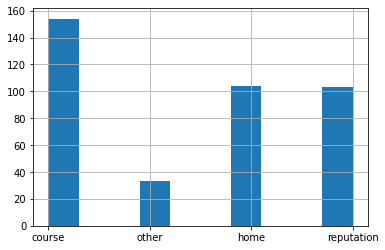

In [90]:
df.reason.hist() # смотрим на распределение
df.reason.describe()

<AxesSubplot:xlabel='reason', ylabel='score'>

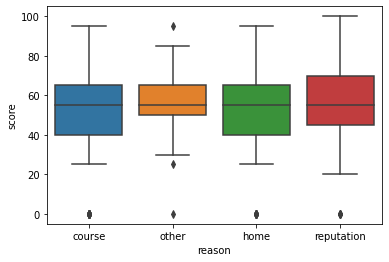

In [91]:
sns.boxplot(x = 'reason', y = 'score', data = df)

**Вывод:** 
 - влияние `reason` на переменную `score` слабое, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>guardian</font>

`guardian` — опекун ('`mother`' - мать, '`father`' - отец, '`other`' - другое)

In [92]:
pd.DataFrame(df.guardian.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,guardian
mother,249
father,86
NaN,31
other,28


In [93]:
df.guardian.fillna(df.guardian.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.guardian.value_counts(dropna=False)) # проверяем результат замены

,guardian
mother,280
father,86
other,28


<AxesSubplot:xlabel='guardian', ylabel='score'>

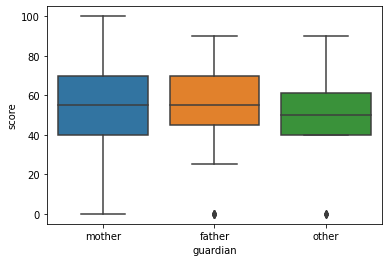

In [94]:
sns.boxplot(x = 'guardian', y = 'score', data = df)

**Вывод:** 
 - влияние `guardian` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>traveltime</font>

`traveltime` — время в пути до школы (`1` - <15 мин., `2` - 15-30 мин., `3` - 30-60 мин., `4` - >60 мин.)

In [95]:
pd.DataFrame(df.traveltime.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,traveltime
1.0,241
2.0,96
NaN,28
3.0,22
4.0,7


In [96]:
df.traveltime.fillna(df.traveltime.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.traveltime.value_counts(dropna=False)) # проверяем результат замены

,traveltime
1.0,269
2.0,96
3.0,22
4.0,7


count    394.000000
mean       1.408629
std        0.679040
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

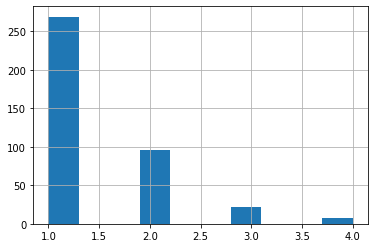

In [97]:
df.traveltime.hist() # смотрим на распределение
df.traveltime.describe()

<AxesSubplot:xlabel='traveltime', ylabel='score'>

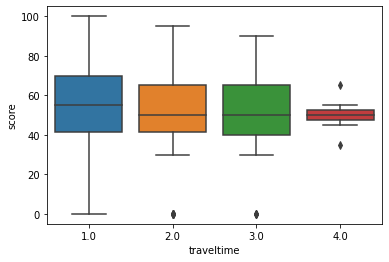

In [98]:
sns.boxplot(x = 'traveltime', y = 'score', data = df)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


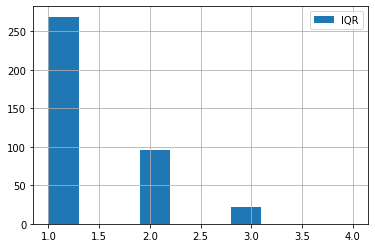

In [99]:
# посмотрим на выбросы воспользовавшись формулой интерквартильного расстояния (межквартильного размаха)
# выбросами будем считать все значение, которые лежат вне IQR 

IQR = df.traveltime.quantile(0.75) - df.traveltime.quantile(0.25)
perc25 = df.traveltime.quantile(0.25)
perc75 = df.traveltime.quantile(0.75)

print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.traveltime.loc[df.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (1, 4), label = 'IQR')
 
plt.legend();

**Вывод:** 
- из последних двух графиков можно сделать вывод, что 7 записей со значением `traveltime = 4.0` можно считать выбросами, которые можно удалить, но так как в целом влияние `traveltime` на переменную `score` слабо выражено (так как медиана на бокспоте у всех значений сравнима), параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>studytime</font>

`studytime` — время на учёбу помимо школы в неделю (`1` - <2 часов, `2` - 2-5 часов, `3` - 5-10 часов, `4` - >10 часов)

In [100]:
pd.DataFrame(df.studytime.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,studytime
2.0,194
1.0,102
3.0,64
4.0,27
NaN,7


In [101]:
df.studytime.fillna(df.studytime.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.studytime.value_counts(dropna=False)) # проверяем результат замены

,studytime
2.0,201
1.0,102
3.0,64
4.0,27


count    394.000000
mean       2.040609
std        0.833995
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

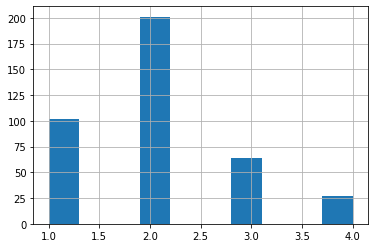

In [102]:
df.studytime.hist() # смотрим на распределение
df.studytime.describe()

<AxesSubplot:xlabel='studytime', ylabel='score'>

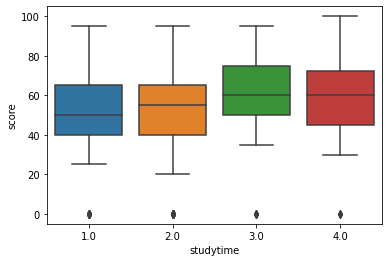

In [103]:
sns.boxplot(x = 'studytime', y = 'score', data = df)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


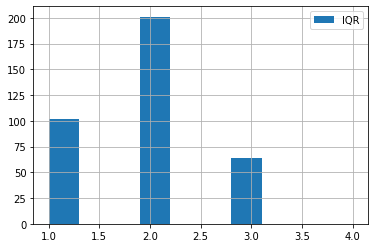

In [104]:
# посмотрим на выбросы воспользовавшись формулой интерквартильного расстояния (межквартильного размаха)
# выбросами будем считать все значение, которые лежат вне IQR 

IQR = df.studytime.quantile(0.75) - df.studytime.quantile(0.25)
perc25 = df.studytime.quantile(0.25)
perc75 = df.studytime.quantile(0.75)

print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.studytime.loc[df.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (1, 4), label = 'IQR')
 
plt.legend();

In [216]:
df[df.studytime == 4.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,school_code,sex_code,address_code,famsize_code,Pstatus_code,Mjob_code,Fjob_code,schoolsup_code,higher_code
47,GP,M,16,U,GT3,T,4.0,3.0,health,other,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0,1,2,1,1,1,5,1,2,1
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,no,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0,1,2,1,1,2,1,2,2,1
67,GP,F,16,U,GT3,T,3.0,2.0,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,3.0,5.0,4.0,30.0,1,1,1,1,1,2,1,1,1
69,GP,F,15,R,LE3,T,3.0,1.0,other,other,reputation,father,2.0,4.0,0.0,no,yes,no,no,no,-12.0,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0,1,1,2,2,1,1,1,2,1
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,1.0,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0,1,2,1,1,1,1,1,2,1
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,no,no,no,yes,-12.0,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0,1,2,1,1,1,1,1,2,1
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,3.0,4.0,3.0,1.0,8.0,50.0,1,2,1,1,1,3,1,2,1
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0,1,1,1,1,1,1,1,2,1
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,4.0,3.0,4.0,4.0,6.0,70.0,1,2,1,2,1,2,5,2,1
95,GP,F,15,R,GT3,T,1.0,1.0,at_home,other,home,mother,2.0,4.0,1.0,yes,yes,yes,yes,yes,-12.0,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0,1,1,2,1,1,4,1,1,1


**Вывод:**
- несмотря на то, что значение `4.0` является выбросом, он содержит максимальную оценку в `100` баллов, по этой причине оставим пока этот параметр в финальной выборке

In [217]:
final_df['studytime'] = df.studytime

## <font color=DodgerBlue>failures</font>

`failures` — количество внеучебных неудач (`n`, если `1 <= n <=3` , иначе `0`)

In [106]:
pd.DataFrame(df.failures.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,14


In [107]:
df.failures.fillna(df.failures.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.failures.value_counts(dropna=False)) # проверяем результат замены

,failures
0.0,315
1.0,49
2.0,16
3.0,14


count    394.000000
mean       0.312183
std        0.714448
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

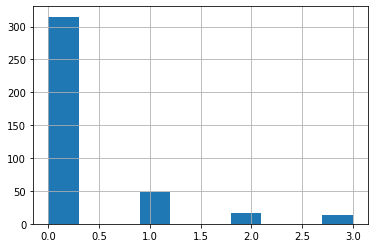

In [108]:
df.failures.hist() # смотрим на распределение
df.failures.describe()

<AxesSubplot:xlabel='failures', ylabel='score'>

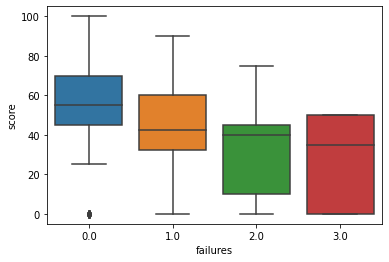

In [109]:
sns.boxplot(x = 'failures', y = 'score', data = df)

**Вывод:**
- влияние `failures` на переменную `score` видна, параметры необходимо взять в финальную выборку.

In [218]:
final_df['failures'] = df.failures

## <font color=DodgerBlue>schoolsup</font>

`schoolsup` — дополнительная образовательная поддержка (`yes` или `no`)

In [110]:
pd.DataFrame(df.schoolsup.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,schoolsup
no,334
yes,51
NaN,9


In [111]:
df.schoolsup.fillna(df.schoolsup.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.schoolsup.value_counts(dropna=False)) # проверяем результат замены

,schoolsup
no,343
yes,51


<AxesSubplot:xlabel='schoolsup', ylabel='score'>

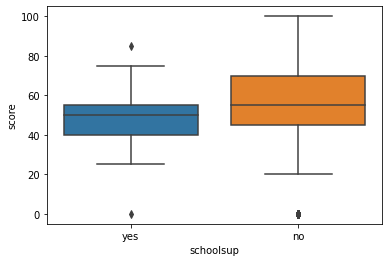

In [112]:
sns.boxplot(x = 'schoolsup', y = 'score', data = df)

**Вывод:** 
 - влияние `schoolsup` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>famsup</font>

`famsup` — семейная образовательная поддержка (`yes` или `no`)

In [115]:
pd.DataFrame(df.famsup.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,famsup
yes,219
no,136
NaN,39


In [116]:
df.famsup.fillna(df.famsup.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.famsup.value_counts(dropna=False)) # проверяем результат замены

,famsup
yes,258
no,136


<AxesSubplot:xlabel='famsup', ylabel='score'>

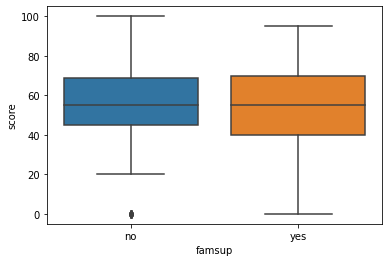

In [117]:
sns.boxplot(x = 'famsup', y = 'score', data = df)

**Вывод:** 
 - влияние `famsup` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>paid</font>

`paid` — дополнительные платные занятия по математике (`yes` или `no`)

In [120]:
pd.DataFrame(df.paid.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,paid
no,199
yes,155
NaN,40


In [121]:
df.paid.fillna(df.paid.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.paid.value_counts(dropna=False)) # проверяем результат замены

,paid
no,239
yes,155


<AxesSubplot:xlabel='paid', ylabel='score'>

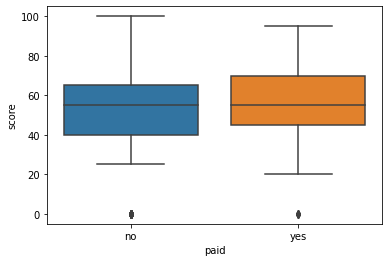

In [122]:
sns.boxplot(x = 'paid', y = 'score', data = df)

**Вывод:** 
 - влияние `paid` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>activities</font>

`activities` — дополнительные внеучебные занятия (`yes` или `no`)

In [123]:
pd.DataFrame(df.activities.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,activities
yes,195
no,185
NaN,14


In [124]:
df.activities.fillna(df.activities.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.activities.value_counts(dropna=False)) # проверяем результат замены

,activities
yes,209
no,185


<AxesSubplot:xlabel='activities', ylabel='score'>

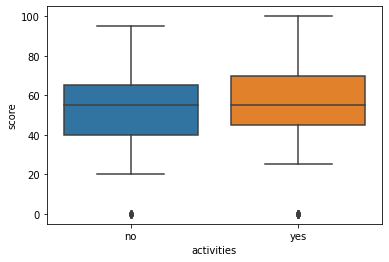

In [125]:
sns.boxplot(x = 'activities', y = 'score', data = df)

**Вывод:** 
 - влияние `activities` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>nursery</font>

`nursery` — посещал детский сад (`yes` или `no`)

In [127]:
pd.DataFrame(df.nursery.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,nursery
yes,300
no,78
NaN,16


In [128]:
df.nursery.fillna(df.nursery.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.nursery.value_counts(dropna=False)) # проверяем результат замены

,nursery
yes,316
no,78


<AxesSubplot:xlabel='nursery', ylabel='score'>

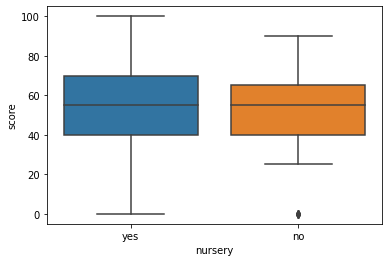

In [129]:
sns.boxplot(x = 'nursery', y = 'score', data = df)

**Вывод:** 
 - влияние `nursery` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>higher</font>

`higher` — хочет получить высшее образование (`yes` или `no`)

In [130]:
pd.DataFrame(df.higher.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,higher
yes,356
NaN,20
no,18


In [131]:
df.higher.fillna(df.higher.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.higher.value_counts(dropna=False)) # проверяем результат замены

,higher
yes,376
no,18


<AxesSubplot:xlabel='higher', ylabel='score'>

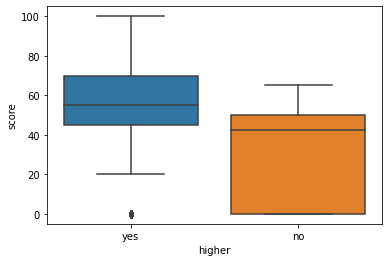

In [132]:
sns.boxplot(x = 'higher', y = 'score', data = df)

**Вывод:** 
 - влияние `higher` на переменную `score` выражено сильно, параметр необходимо оставить для построения модели.

In [222]:
final_df['higher_code'] = df.higher.apply(binar_code)

## <font color=DodgerBlue>studytime, granular</font>

`studytime, granular` - без описания

In [135]:
pd.DataFrame(df['studytime, granular'].value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,"studytime, granular"
-6.0,194
-3.0,102
-9.0,64
-12.0,27
NaN,7


In [140]:
df['studytime, granular'].fillna(df['studytime, granular'].mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df['studytime, granular'].value_counts(dropna=False)) # проверяем результат замены

,"studytime, granular"
-6.0,201
-3.0,102
-9.0,64
-12.0,27


In [141]:
df[['studytime','studytime, granular']] # сравниваем значения в двух колонках

,studytime,"studytime, granular"
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


<AxesSubplot:>

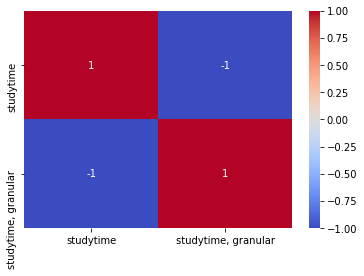

In [145]:
sns.heatmap(df[['studytime','studytime, granular']].corr(), annot = True, cmap = 'coolwarm') # смотрим на корреляцию

**Вывод:** 
 - параметры `studytime` и `studytime, granular` полность коррелируемы со знаком минус, то есть увеличение первого приводит к уменьшению второго
 - для построения модели оставим один из параметров - `studytime`

## <font color=DodgerBlue>internet</font>
    
`internet` — наличие интернета дома (`yes` или `no`)

In [146]:
pd.DataFrame(df.internet.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,internet
yes,304
no,56
NaN,34


In [147]:
df.internet.fillna(df.internet.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.internet.value_counts(dropna=False)) # проверяем результат замены

,internet
yes,338
no,56


<AxesSubplot:xlabel='internet', ylabel='score'>

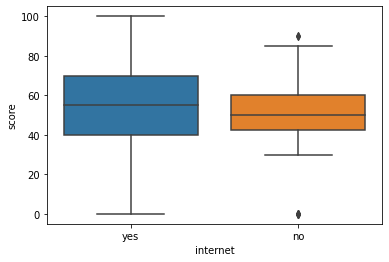

In [148]:
sns.boxplot(x = 'internet', y = 'score', data = df)

**Вывод:** 
 - влияние `internet` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>romantic</font>

`romantic` — в романтических отношениях (`yes` или `no`)

In [153]:
pd.DataFrame(df.romantic.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,romantic
no,271
yes,123


In [154]:
df.romantic.fillna(df.romantic.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.romantic.value_counts(dropna=False)) # проверяем результат замены

,romantic
no,271
yes,123


<AxesSubplot:xlabel='romantic', ylabel='score'>

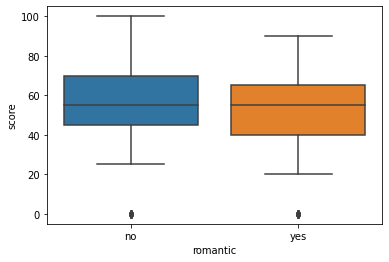

In [155]:
sns.boxplot(x = 'romantic', y = 'score', data = df)

**Вывод:** 
 - влияние `internet` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>famrel</font>

`famrel` — семейные отношения (от `1` - очень плохо до `5` - очень хорошо)

In [156]:
pd.DataFrame(df.famrel.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,famrel
4.0,182
5.0,98
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


Скорее всего вместо значения -1.0 должно быть значение 1.0. 

Устраним ошибку и сделаем замену пропусков на наиболее часто встречающееся значение.

In [159]:
df.famrel.replace(-1.0, 1.0, inplace=True) # исправляем ошибку

df.famrel.fillna(df.famrel.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.famrel.value_counts(dropna=False)) # проверяем результат замены

,famrel
4.0,209
5.0,98
3.0,62
2.0,17
1.0,8


count    394.000000
mean       3.944162
std        0.871913
min        1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

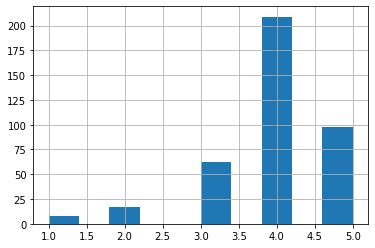

In [160]:
df.famrel.hist() # смотрим на распределение
df.famrel.describe()

<AxesSubplot:xlabel='famrel', ylabel='score'>

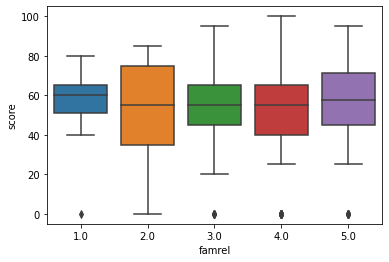

In [161]:
sns.boxplot(x = 'famrel', y = 'score', data = df)

**Вывод:** 
 - влияние `famrel` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>freetime</font>

`freetime` — свободное время после школы (от `1` - очень мало до `5` - очень мого)

In [163]:
pd.DataFrame(df.freetime.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,freetime
3.0,153
4.0,111
2.0,63
5.0,38
1.0,18
NaN,11


In [164]:
df.freetime.fillna(df.freetime.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.freetime.value_counts(dropna=False)) # проверяем результат замены

,freetime
3.0,164
4.0,111
2.0,63
5.0,38
1.0,18


count    394.000000
mean       3.223350
std        0.981178
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

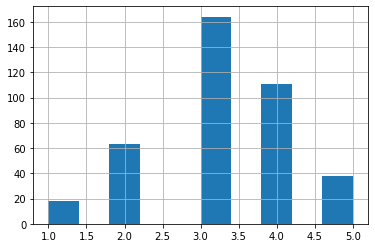

In [165]:
df.freetime.hist() # смотрим на распределение
df.freetime.describe()

<AxesSubplot:xlabel='freetime', ylabel='score'>

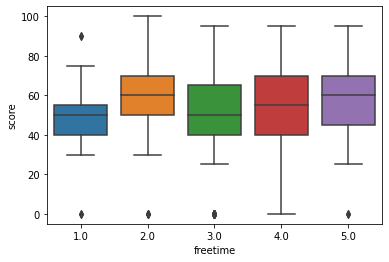

In [166]:
sns.boxplot(x = 'freetime', y = 'score', data = df)

**Вывод:** 
 - влияние `freetime` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>goout</font>

`goout` — проведение времени с друзьями (от `1` - очень мало до `5` - очень много)

In [167]:
pd.DataFrame(df.goout.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,goout
3.0,127
2.0,101
4.0,84
5.0,51
1.0,23
NaN,8


In [168]:
df.goout.fillna(df.goout.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.goout.value_counts(dropna=False)) # проверяем результат замены

,goout
3.0,135
2.0,101
4.0,84
5.0,51
1.0,23


count    394.000000
mean       3.098985
std        1.101860
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

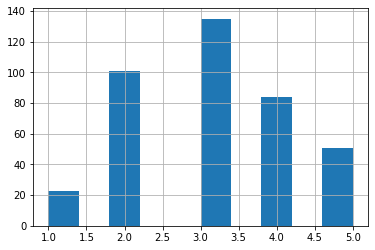

In [169]:
df.goout.hist() # смотрим на распределение
df.goout.describe()

<AxesSubplot:xlabel='goout', ylabel='score'>

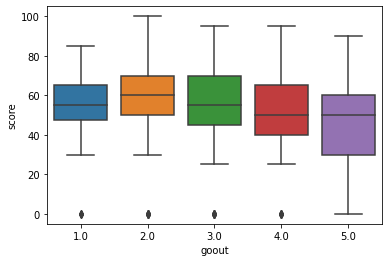

In [170]:
sns.boxplot(x = 'goout', y = 'score', data = df)

**Вывод:** 
 - влияние `freetime` на переменную `score` слабо выражено, параметр можно не брать в финальную выборку.

## <font color=DodgerBlue>health</font>

`health` — текущее состояние здоровья (от `1` - очень плохо до `5` - очень хорошо)

In [171]:
pd.DataFrame(df.health.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,health
5.0,138
3.0,89
4.0,63
1.0,46
2.0,43
NaN,15


In [172]:
df.health.fillna(df.health.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.health.value_counts(dropna=False)) # проверяем результат замены

,health
5.0,153
3.0,89
4.0,63
1.0,46
2.0,43


count    394.000000
mean       3.593909
std        1.393392
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

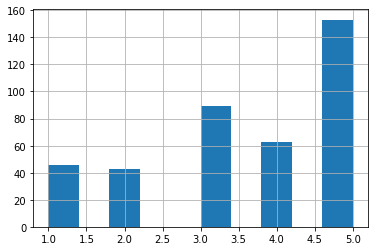

In [173]:
df.health.hist() # смотрим на распределение
df.health.describe()

<AxesSubplot:xlabel='health', ylabel='score'>

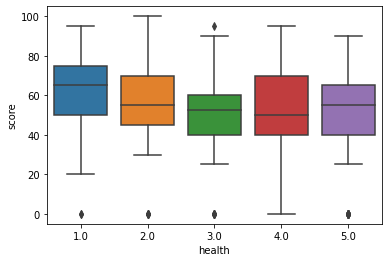

In [174]:
sns.boxplot(x = 'health', y = 'score', data = df)

**Вывод:** 
 - влияние `health` на переменную `score` есть, пусть и небольшое, пока возьмем параметр в финальную выборку.

In [230]:
final_df['health'] = df.health

## <font color=DodgerBlue>absences</font>

`absences` — количество пропущенных занятий

In [175]:
pd.DataFrame(df.absences.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
NaN,12
3.0,8


In [233]:
df.absences.fillna(df.absences.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением

count    394.000000
mean       7.035533
std       23.163953
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

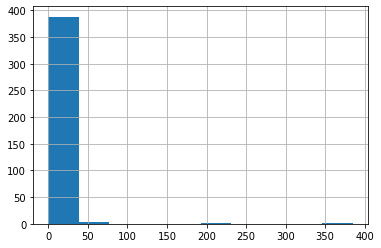

In [232]:
df.absences.hist() # смотрим на распределение
df.absences.describe()

<AxesSubplot:xlabel='absences', ylabel='score'>

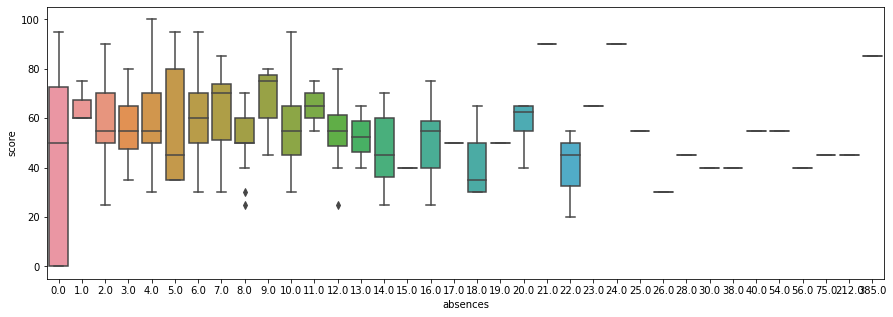

In [234]:
plt.figure(figsize=(15, 5)) 
sns.boxplot(x = 'absences', y = 'score', data = df) # смотрим на связь с экзаменационной оценкой

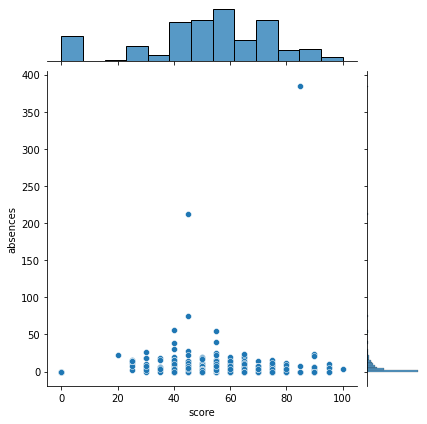

In [235]:
sns.jointplot(x = 'score', y = 'absences', data = df, kind = 'scatter')

Из графика выше видно, где сосредоточена оснавная часть значений. Посмотрим на них "ближе" :

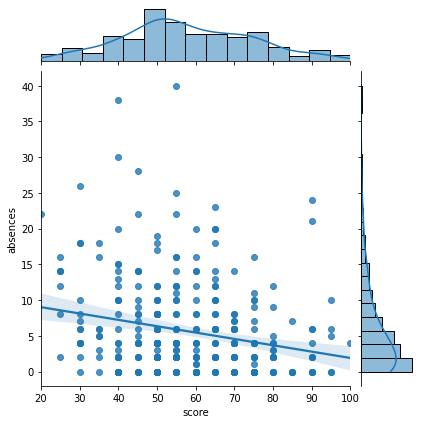

In [236]:
new_df = df[(df.score >= 20) & (df.absences < 50)]
sns.jointplot(x = 'score', y = 'absences', data = new_df, kind = 'reg')

**Вывод:**
- все пропуски более 8 раз являются выбросами
- есть тенденция повышения экзаменационной оценки с уменьшением количества пропусков

Оставим переменную `absences` в финальной выборке для построения модели.

In [237]:
final_df['absences'] = df.absences

## <font color=DodgerBlue>score</font>

`score` — баллы по госэкзамену по математике

In [238]:
pd.DataFrame(df.score.value_counts(dropna=False)) # смотрим на уникальные и пустые значения

,score
50.0,60
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
45.0,27
70.0,27
80.0,16


In [239]:
df.score.fillna(df.score.mode()[0], inplace=True) # заполняем пропуски наиболее часто встречающимся значением
pd.DataFrame(df.score.value_counts(dropna=False)) # проверяем результат замены

,score
50.0,60
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
45.0,27
70.0,27
80.0,16


count    394.000000
mean      52.258883
std       22.766074
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

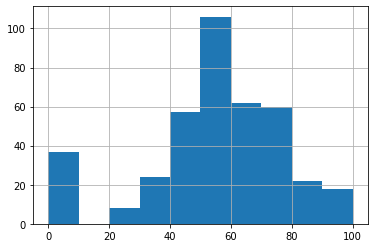

In [240]:
df.score.hist() # смотрим на распределение
df.score.describe()

In [242]:
final_df['score'] = df.score # добавим в финальную выборку

# <font color=DodgerBlue>Анализируем результат</font>

<AxesSubplot:>

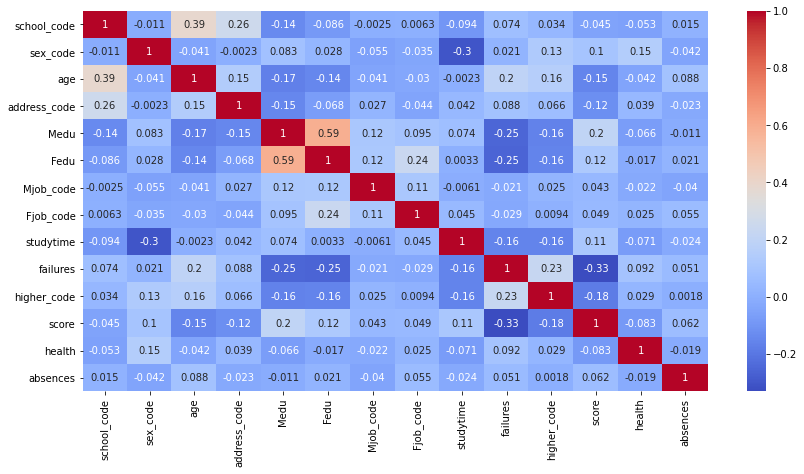

In [243]:
plt.figure(figsize=(14, 7))

sns.heatmap(final_df.corr(), annot = True, cmap = 'coolwarm') # смотрим на корреляцию оставшихся параметров

Видим, что `Medu` и `Fedu` коррелируют друг с другом, поэтому можно оставить одно из значений в финальной выборке. 

Сделаем **Тест Стьюдента** для рабочей и финальной выборки, и сравним результаты - можно будет увидеть, все ли необходимые параметры были включены в финальную выборку, есть ли лишние или ошибочно исключенные:

In [246]:
# Тест Стьюдента для рабочей выборки:

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [249]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users

Найдены статистически значимые различия для колонки absences
Найдены статистически значимые различия для колонки score


In [250]:
# Тест Стьюдента для финальной выборки:

def get_stat_dif(column):
    cols = final_df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(final_df.loc[final_df.loc[:, column] == comb[0], 'score'], 
                        final_df.loc[final_df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [252]:
for col in ['school_code','sex_code','age','address_code','Medu','Fedu','Mjob_code','Fjob_code','studytime','failures','higher_code','score','health','absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex_code
Найдены статистически значимые различия для колонки address_code
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob_code
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher_code
Найдены статистически значимые различия для колонки score
Найдены статистически значимые различия для колонки absences


C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alla.kuchmar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users

Списки полученных статистически значимых значений:

- рабочая выборка:
    `address`
    `Medu`
    `Mjob`
    `failures`
    `higher`
    `romantic`
    `absences`
    `score`

- финальная выборка:
    `address_code`
    `sex_code`
    `Medu`
    `Mjob_code`
    `failures`
    `higher_code`
    `absences`
    `score`


# Выводы

В результате **EDA** для анализа влияния условий жизни на успеваемость школьников по математике:

* В данных около **5%** пустых значений.


* Только в двух значениях были ошибки из разряда опечаток, то есть данные довольно чистые.


* В данных есть выборосы. Почищен выброс только для параметра возраста, для остальных данных я их оставила, т.к. нет ощущения, что их нужно удалять - выбросов много, а строк в таблице всего около **400**


* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, 
    * это 
    `sex`
    `address`
    `Medu`
    `Mjob`
    `failures`
    `higher`
    `absences`
    `score`
    * и доп. колонки для номинативных значений:
    `address_code`
    `sex_code`
    `Mjob_code`
    `higher_code`


In [259]:
df_for_model = pd.DataFrame()
df_for_model = df.loc[:, ['sex', 'address', 'Medu', 'Mjob', 'failures','higher','absences','score']]
df_for_model['address_code'] = final_df.address_code
df_for_model['sex_code'] = final_df.sex_code
df_for_model['Mjob_code'] = final_df.Mjob_code
df_for_model['higher_code'] = final_df.higher_code
df_for_model

,sex,address,Medu,Mjob,failures,higher,absences,score,address_code,sex_code,Mjob_code,higher_code
0,F,U,4.0,at_home,0.0,yes,6.0,30.0,1,1,4,1
1,F,U,1.0,at_home,0.0,yes,4.0,30.0,1,1,4,1
2,F,U,1.0,at_home,3.0,yes,10.0,50.0,1,1,4,1
3,F,U,4.0,health,0.0,yes,2.0,75.0,1,1,5,1
4,F,U,3.0,other,0.0,yes,4.0,50.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,U,2.0,services,2.0,yes,212.0,45.0,1,2,2,1
391,M,U,3.0,services,0.0,yes,3.0,80.0,1,2,2,1
392,M,R,1.0,other,3.0,yes,3.0,35.0,2,2,1,1
393,M,R,3.0,services,0.0,yes,0.0,50.0,2,2,2,1
